In [1]:
# 2023.11.11
# reconstructed code 

# no random init
# 1D sine function

# compute with k = 3

In [ ]:
import os

cuda_device = '3'

os.environ["CUDA_VISIBLE_DEVICES"] = cuda_device
os.environ['CUBLAS_WORKSPACE_CONFIG']=':4096:8'

import torch

import numpy as np

from para_init import parameters, setup_seed
from permutation import permutation_train



In [ ]:
import torch.multiprocessing as mp
num_processes = 10

width_vector = [10, 20, 40, 80, 160, 320]

# generate a 2-dimensional matrix to hold the results in (i,j)
result_matrix = np.zeros((len(width_vector), 10, 2))

i = 0

for width in width_vector:
    
    setup_seed(2022)
    
    shared_params = parameters()
    
    shared_params.width = width
    shared_params.adjust_scale = 10
    shared_params.k_period = 3
    
            
    if __name__ == "__main__":
        
        mp.set_start_method('spawn', force=True)
        
        manager = mp.Manager()
        results_queue = manager.Queue()

        mp.spawn(permutation_train, args=(shared_params, results_queue), nprocs=num_processes, join=True)
        
        while not results_queue.empty():
            (idx, (error, error_infty)) = results_queue.get()

            result_matrix[i, idx, :] = [error, error_infty]

    i += 1
    

In [6]:
print(result_matrix)

[[[2.44592592e-01 1.02228546e+00]
  [1.24704398e-01 6.12422109e-01]
  [1.81112826e-01 1.19374859e+00]
  [8.41688514e-02 6.14931524e-01]
  [2.50775516e-02 4.52266127e-01]
  [3.40126902e-01 1.02892387e+00]
  [4.48534995e-01 1.17440820e+00]
  [2.36774176e-01 8.81262839e-01]
  [4.89383072e-01 1.19036865e+00]
  [2.89612651e-01 1.03312361e+00]]

 [[1.09644465e-01 6.09717250e-01]
  [1.32411748e-01 8.63335133e-01]
  [3.37043479e-02 3.99208695e-01]
  [4.06006426e-02 6.48709059e-01]
  [4.18404602e-02 4.86592799e-01]
  [7.48217404e-02 4.64432359e-01]
  [1.74529389e-01 9.74188447e-01]
  [2.38390237e-01 8.62610519e-01]
  [1.29416212e-01 8.68938208e-01]
  [1.14361057e-02 2.34401107e-01]]

 [[2.14971732e-02 3.36297125e-01]
  [5.65453619e-03 1.78991094e-01]
  [7.78235728e-03 1.92730784e-01]
  [3.49203497e-02 4.35634583e-01]
  [5.11821769e-02 5.68414927e-01]
  [1.91148110e-02 2.51545966e-01]
  [3.65229696e-02 3.98331642e-01]
  [2.19273828e-02 3.97449464e-01]
  [2.55811606e-02 3.92504841e-01]
  [4.18169

(6, 10, 2)
0.8779905225007081
<class 'numpy.ndarray'>
0.0
[0.18949375 0.07216357 0.02209165 0.01044197 0.00540468 0.00153487]
[0.87799052 0.59184125 0.34184991 0.24270752 0.17339191 0.09365964]
y_min: [0.02507755 0.01143611 0.00565454 0.00190287 0.00049809 0.0002758 ]
y_max: [0.48938307 0.23839024 0.05118218 0.03973049 0.01764912 0.00890999]
[[0.1644162  0.06072747 0.01643712 0.0085391  0.0049066  0.00125908]
 [0.29988932 0.16622667 0.02909052 0.02928852 0.01224443 0.00737512]]


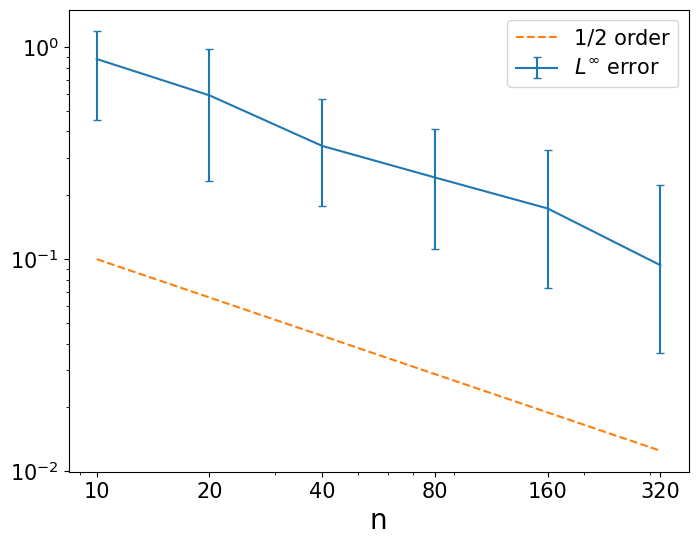

In [ ]:
from statistics import geometric_mean
import matplotlib.pyplot as plt

x = width_vector

print(np.shape(result_matrix))

print(geometric_mean(result_matrix[0,:,1]))

mean = np.zeros(int(len(x)))
mean_inf = np.zeros(int(len(x)))

print(type(mean))

print(mean[0])

for i in range(len(x)):
    mean[i] = geometric_mean(result_matrix[i,:,0])
    mean_inf[i] = geometric_mean(result_matrix[i,:,1])

print(mean)
print(mean_inf)

y_max = np.max(result_matrix[:,:,0], axis = 1)
y_min = np.min(result_matrix[:,:,0], axis = 1)

y_min_inf = np.min(result_matrix[:,:,1], axis = 1)
y_max_inf = np.max(result_matrix[:,:,1], axis = 1)

yerr = np.abs(np.vstack((y_min, y_max)) - mean)

print('y_min: '+str(y_min))
print('y_max: '+str(y_max))
print(yerr)

yerr2 = np.abs(np.vstack((y_min_inf, y_max_inf)) - mean_inf)

start_point = 1E-1

x_ref = [x[0], x[-1]]
y_ref = [start_point, start_point/np.sqrt(np.power(2,len(x)))]

ax = plt.figure(figsize=(8, 6))
plt.errorbar(x, mean_inf, yerr=yerr2, capsize = 3, label='$L^\infty$ error')
plt.plot(x_ref, y_ref, linestyle='--', label='1/2 order')
plt.yscale('log')
plt.xscale('log')
plt.xlabel('n', size=20)
plt.legend(fontsize=15)
plt.xticks(x, x, fontsize=15)
plt.yticks(fontsize=15)
plt.savefig('plot.pdf', bbox_inches='tight')
plt.show()